In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import sqlite3

In [5]:
Start_date="2011-05-10"
End_date="2011-05-22"

In [6]:
engine1 = create_engine("sqlite:///measurements.sqlite")
engine2 = create_engine("sqlite:///stations.sqlite")

In [7]:
conn1 = engine1.connect()
conn2 = engine2.connect()

In [8]:
conn1.execute("select * from weather order by date desc limit 5").fetchall()

[(2685, 'USC00519397', '2017-08-23', 0, 81),
 (7318, 'USC00514830', '2017-08-23', 0, 82),
 (10915, 'USC00519523', '2017-08-23', 0.08, 82),
 (18103, 'USC00516128', '2017-08-23', 0.45, 76),
 (2684, 'USC00519397', '2017-08-22', 0, 82)]

In [9]:
Base1 = automap_base()
Base1.prepare(engine1, reflect=True)
Base1.classes.keys()
Base2 = automap_base()
Base2.prepare(engine2, reflect=True)
Base2.classes.keys()

['stations']

In [10]:
Measurement = Base1.classes.weather
Stations= Base2.classes.stations

In [11]:
session1 = Session(engine1) 
session2 = Session(engine2)

In [12]:
# #Precipitation Analysis

# #Design a query to retrieve the last 12 months of precipitation data.
perc = session1.query(Measurement).filter(Measurement.date>='2016-08-23').all()
for el in perc:
    print("Station:{0} Date:{1} Percipitation: {2}".format(el.station,el.date,el.prcp))


/anaconda3/lib/python3.6/site-packages/sqlalchemy/sql/sqltypes.py:603: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


Station:USC00519397 Date:2016-08-23 Percipitation: 0E-10
Station:USC00519397 Date:2016-08-24 Percipitation: 0.0800000000
Station:USC00519397 Date:2016-08-25 Percipitation: 0.0800000000
Station:USC00519397 Date:2016-08-26 Percipitation: 0E-10
Station:USC00519397 Date:2016-08-27 Percipitation: 0E-10
Station:USC00519397 Date:2016-08-28 Percipitation: 0.0100000000
Station:USC00519397 Date:2016-08-29 Percipitation: 0E-10
Station:USC00519397 Date:2016-08-30 Percipitation: 0E-10
Station:USC00519397 Date:2016-08-31 Percipitation: 0.1300000000
Station:USC00519397 Date:2016-09-01 Percipitation: 0E-10
Station:USC00519397 Date:2016-09-02 Percipitation: 0E-10
Station:USC00519397 Date:2016-09-03 Percipitation: 0E-10
Station:USC00519397 Date:2016-09-04 Percipitation: 0.0300000000
Station:USC00519397 Date:2016-09-07 Percipitation: 0.0500000000
Station:USC00519397 Date:2016-09-08 Percipitation: 0E-10
Station:USC00519397 Date:2016-09-09 Percipitation: 0.0300000000
Station:USC00519397 Date:2016-09-10 Per

Station:USC00516128 Date:2017-02-12 Percipitation: 1.8300000000
Station:USC00516128 Date:2017-02-13 Percipitation: 0E-10
Station:USC00516128 Date:2017-02-14 Percipitation: 0.0100000000
Station:USC00516128 Date:2017-02-15 Percipitation: 0.0700000000
Station:USC00516128 Date:2017-02-16 Percipitation: 0.1300000000
Station:USC00516128 Date:2017-02-19 Percipitation: 0.1000000000
Station:USC00516128 Date:2017-02-20 Percipitation: 0E-10
Station:USC00516128 Date:2017-02-21 Percipitation: 0.0700000000
Station:USC00516128 Date:2017-02-22 Percipitation: 0.3200000000
Station:USC00516128 Date:2017-02-23 Percipitation: 0E-10
Station:USC00516128 Date:2017-02-24 Percipitation: 0E-10
Station:USC00516128 Date:2017-02-25 Percipitation: 0.1200000000
Station:USC00516128 Date:2017-02-26 Percipitation: 0E-10
Station:USC00516128 Date:2017-02-27 Percipitation: 0E-10
Station:USC00516128 Date:2017-02-28 Percipitation: 0.5800000000
Station:USC00516128 Date:2017-03-01 Percipitation: 2.0000000000
Station:USC0051612

In [13]:
# Select only the date and prcp values.
# perc = session1.query(Measurement.date,Measurement.prcp).filter(Measurement.date>='2016-08-23',Measurement.station=='USC00519397').all()
perc = session1.query(Measurement.date,Measurement.prcp).filter(Measurement.date>='2016-08-23').all()

In [14]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
myDict = {'date':[],'prcp':[]}
for el in perc:
#     print("Date:{0} Percipitation: {1}".format(el.date,el.prcp))
    myDict['date'].append(el.date)
    myDict['prcp'].append(float(el.prcp))
# df = pd.DataFrame.from_dict(data=myDict)
df = pd.DataFrame(data=myDict)
df.set_index('date')
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [14]:
# Plot the results using the DataFrame plot method
df.plot(kind="bar", label='Percipitation', figsize=(200,100))
plt.xticks(range(len(df['date'])),df['date'])
plt.legend()
plt.show()


In [15]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to calculate the total number of stations.
NumberOfstations = session2.query(func.count(Stations.station))
for el in NumberOfstations:
    print('No. of Stations: {0}'.format(el[0]))

No. of Stations: 9


In [17]:
# List the stations and observation counts in descending order
output = session1.query(Measurement.station,func.count(Measurement.date)).group_by(Measurement.station).order_by(func.count(Measurement.date).desc())
for el in output:
    print('Station {0} has {1} observations'.format(el[0],el[1]))

Station USC00519281 has 2772 observations
Station USC00513117 has 2696 observations
Station USC00519397 has 2685 observations
Station USC00519523 has 2572 observations
Station USC00516128 has 2484 observations
Station USC00514830 has 1937 observations
Station USC00511918 has 1932 observations
Station USC00517948 has 683 observations
Station USC00518838 has 342 observations


In [18]:
# Which station has the highest number of observations?
output2 = session1.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).limit(1)
for el in output2:
    print('Max. No. of observations belongs to {0}'.format(el[0]))


Max. No. of observations belongs to USC00519281


In [19]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
tobs1 = session1.query(Measurement).filter(Measurement.date>='2016-08-23').all()
for el in tobs1:
    print("Station:{0} Date:{1} Temperature: {2}".format(el.station,el.date,el.tobs))


Station:USC00519397 Date:2016-08-23 Temperature: 81
Station:USC00519397 Date:2016-08-24 Temperature: 79
Station:USC00519397 Date:2016-08-25 Temperature: 80
Station:USC00519397 Date:2016-08-26 Temperature: 79
Station:USC00519397 Date:2016-08-27 Temperature: 77
Station:USC00519397 Date:2016-08-28 Temperature: 78
Station:USC00519397 Date:2016-08-29 Temperature: 78
Station:USC00519397 Date:2016-08-30 Temperature: 79
Station:USC00519397 Date:2016-08-31 Temperature: 80
Station:USC00519397 Date:2016-09-01 Temperature: 81
Station:USC00519397 Date:2016-09-02 Temperature: 80
Station:USC00519397 Date:2016-09-03 Temperature: 79
Station:USC00519397 Date:2016-09-04 Temperature: 75
Station:USC00519397 Date:2016-09-07 Temperature: 76
Station:USC00519397 Date:2016-09-08 Temperature: 80
Station:USC00519397 Date:2016-09-09 Temperature: 79
Station:USC00519397 Date:2016-09-10 Temperature: 78
Station:USC00519397 Date:2016-09-11 Temperature: 76
Station:USC00519397 Date:2016-09-12 Temperature: 78
Station:USC0

Station:USC00516128 Date:2017-01-22 Temperature: 68
Station:USC00516128 Date:2017-01-23 Temperature: 70
Station:USC00516128 Date:2017-01-24 Temperature: 67
Station:USC00516128 Date:2017-01-25 Temperature: 69
Station:USC00516128 Date:2017-01-26 Temperature: 67
Station:USC00516128 Date:2017-01-27 Temperature: 69
Station:USC00516128 Date:2017-01-28 Temperature: 64
Station:USC00516128 Date:2017-01-29 Temperature: 67
Station:USC00516128 Date:2017-01-30 Temperature: 66
Station:USC00516128 Date:2017-01-31 Temperature: 65
Station:USC00516128 Date:2017-02-01 Temperature: 65
Station:USC00516128 Date:2017-02-02 Temperature: 60
Station:USC00516128 Date:2017-02-05 Temperature: 69
Station:USC00516128 Date:2017-02-06 Temperature: 73
Station:USC00516128 Date:2017-02-07 Temperature: 68
Station:USC00516128 Date:2017-02-08 Temperature: 68
Station:USC00516128 Date:2017-02-09 Temperature: 64
Station:USC00516128 Date:2017-02-10 Temperature: 70
Station:USC00516128 Date:2017-02-11 Temperature: 66
Station:USC0

In [20]:
# Filter by the station with the highest number of observations.
tobs2 = session1.query(Measurement).filter(Measurement.date>='2016-08-23' , Measurement.station=='USC00519281').all()
myTOBS = []
for el in tobs2:
    print("Station:{0} Date:{1} Temperature: {2}".format(el.station,el.date,el.tobs))
    myTOBS.append(el.tobs)

Station:USC00519281 Date:2016-08-23 Temperature: 77
Station:USC00519281 Date:2016-08-24 Temperature: 77
Station:USC00519281 Date:2016-08-25 Temperature: 80
Station:USC00519281 Date:2016-08-26 Temperature: 80
Station:USC00519281 Date:2016-08-27 Temperature: 75
Station:USC00519281 Date:2016-08-28 Temperature: 73
Station:USC00519281 Date:2016-08-29 Temperature: 78
Station:USC00519281 Date:2016-08-30 Temperature: 77
Station:USC00519281 Date:2016-08-31 Temperature: 78
Station:USC00519281 Date:2016-09-01 Temperature: 80
Station:USC00519281 Date:2016-09-02 Temperature: 80
Station:USC00519281 Date:2016-09-03 Temperature: 78
Station:USC00519281 Date:2016-09-04 Temperature: 78
Station:USC00519281 Date:2016-09-05 Temperature: 78
Station:USC00519281 Date:2016-09-06 Temperature: 73
Station:USC00519281 Date:2016-09-07 Temperature: 74
Station:USC00519281 Date:2016-09-08 Temperature: 80
Station:USC00519281 Date:2016-09-09 Temperature: 79
Station:USC00519281 Date:2016-09-10 Temperature: 77
Station:USC0

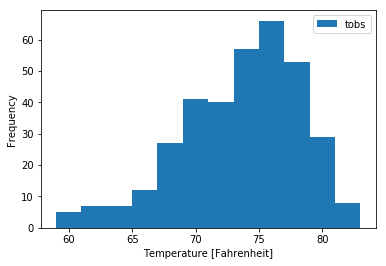

In [21]:
# Plot the results as a histogram with bins=12.
plt.hist(myTOBS,bins=12,label='tobs')
plt.legend()
plt.xlabel('Temperature [Fahrenheit]')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
def calc_temps(startDate,endDate):
    tobs1 = session1.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).filter(Measurement.date>=startDate,Measurement.date<=endDate).all()
    for el in tobs1:
        print('Min. Temp. = {0} Avg. Temp. = {1} Max. Temp. = {2}'.format(el[0],el[1],el[2]))
        return el[0],el[1],el[2]
lastYearStartDate = str(int(Start_date.split('-')[0])-1)+Start_date[4:]
lastYearEndDate = str(int(End_date.split('-')[0])-1)+End_date[4:]

minTemp, avgTemp, maxTemp = calc_temps(lastYearStartDate,lastYearEndDate)




Min. Temp. = 68 Avg. Temp. = 73.93 Max. Temp. = 80


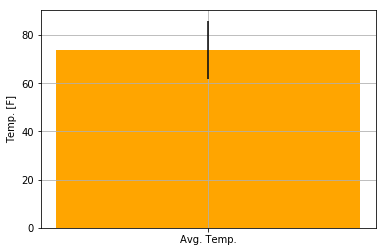

In [34]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
# Use the average temperature as the bar height.
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
plt.bar(['Avg. Temp.'],[avgTemp],yerr=maxTemp-minTemp,color='orange')
plt.grid()
plt.ylabel('Temp. [F]')
plt.show()


In [37]:
# Optional Recommended Analysis
# The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.
# Calcualte the rainfall per weather station using the previous year's matching dates.
rainfall = session1.query(Measurement.station,func.sum(Measurement.prcp)).filter(Measurement.date>=lastYearStartDate,Measurement.date<=lastYearEndDate).group_by(Measurement.station)
for el in rainfall:
    print(el[0],el[1])

USC00511918 0.0600000000
USC00513117 0.3600000000
USC00514830 0.2100000000
USC00516128 2.8900000000
USC00517948 0.0500000000
USC00518838 1.3300000000
USC00519281 0.9000000000
USC00519397 0.0300000000
USC00519523 0.2300000000
